In [2]:
import yfinance as _yf
import pandas as pd
import quantstats as qs
import pdfkit

In [3]:
# Extend pandas functionality with the quantstats metrics, etc.
qs.extend_pandas()

In [4]:
# A function to download bekchmark returns
def download_prices(ticker):
        p = {"period": "max"}
        return _yf.Ticker(ticker).history(**p)['Close']

In [5]:
# --- Strategy ---

In [8]:
# Strategy start capital
init_capital = 100 * 1000

In [10]:
zorro_out = "./Data/Test_Report.csv"
df_data = pd.read_csv(zorro_out)

In [11]:
df_analysis = pd.DataFrame()
df_analysis["pnl_with_capital"]  = df_data["PnL"] + init_capital
df_analysis["ret"] =  df_analysis["pnl_with_capital"].pct_change()
df_analysis["Date"] = pd.to_datetime( df_data["Date"] ).apply(lambda d: d.date())
df_analysis = df_analysis.set_index( pd.DatetimeIndex( df_analysis["Date"] ) )

In [12]:
df_analysis.tail()

,pnl_with_capital,ret,Date
Date,,,
2022-04-29,100121.30343,0.0,2022-04-29
2022-04-30,100121.30343,0.0,2022-04-30
2022-05-01,100121.30343,0.0,2022-05-01
2022-05-02,100121.30343,0.0,2022-05-02
2022-05-03,100121.30343,0.0,2022-05-03


In [13]:
# --- Benchmark ---

In [14]:
bmk_ticker = "BTC-USD"
bmk = download_prices(bmk_ticker)

In [15]:
bmk.tail()

Date
2022-05-20    29200.740234
2022-05-21    29432.226562
2022-05-22    30323.722656
2022-05-23    29098.910156
2022-05-24    29367.712891
Name: Close, dtype: float64

In [16]:
mask_bk = bmk.index.isin( df_analysis.index )
bmk = bmk[mask_bk]
df_analysis["BMK"] = df_analysis.apply(lambda row: bmk[ pd.to_datetime(row.Date) ], axis=1)
df_analysis["BMK"] = df_analysis["BMK"].pct_change()

In [18]:
# --- Out ---

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2021-03-31  2021-03-31
End Period                 2022-05-03  2022-05-03
Risk-Free Rate             0.0%        0.0%
Time in Market             26.0%       100.0%

Cumulative Return          0.12%       -36.12%
CAGR﹪                     0.11%       -33.7%

Sharpe                     0.21        -0.18
Prob. Sharpe Ratio         60.47%      41.25%
Smart Sharpe               0.2         -0.17
Sortino                    0.26        -0.25
Smart Sortino              0.26        -0.24
Sortino/√2                 0.18        -0.18
Smart Sortino/√2           0.18        -0.17
Omega                      1.09        1.09

Max Drawdown               -0.46%      -53.06%
Longest DD Days            188         188
Volatility (ann.)          0.37%       59.66%
R^2                        0.0         0.0
Information Ratio          0.01        0.01
Calmar                     0.24 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-10-27,2021-11-15,2022-05-03,188,-0.462836,-0.453103
2,2021-05-09,2021-06-30,2021-09-29,143,-0.256676,-0.250026
3,2021-04-16,2021-04-29,2021-05-06,20,-0.149161,-0.125440
4,2021-04-03,2021-04-03,2021-04-06,3,-0.086461,-0.055392
5,2021-10-06,2021-10-10,2021-10-21,15,-0.029835,-0.015127


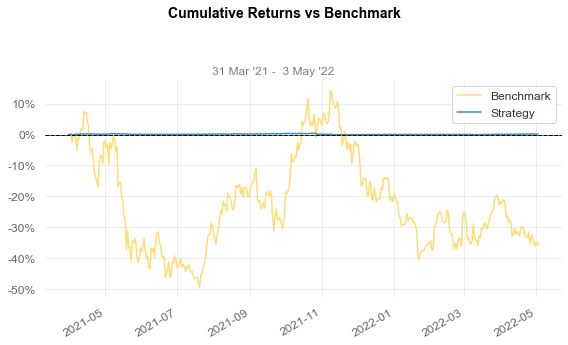

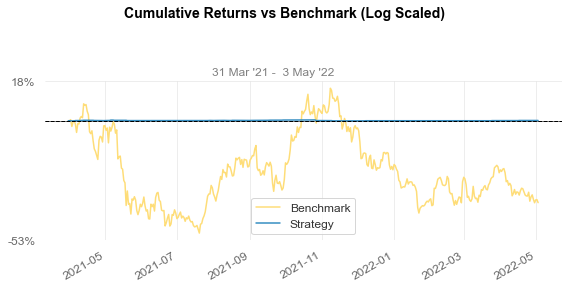

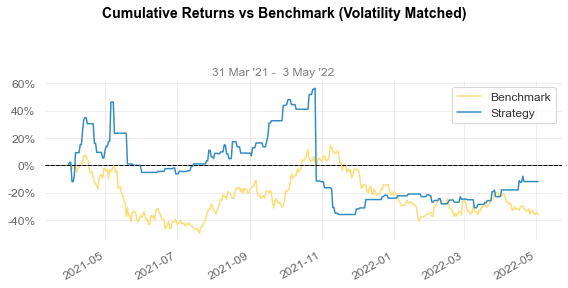

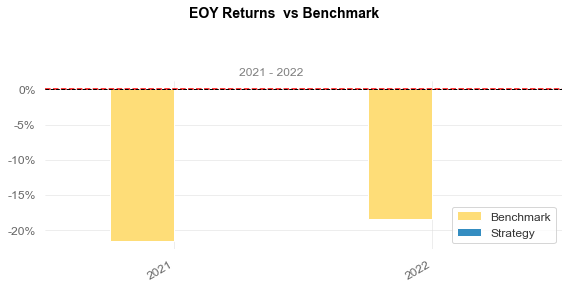

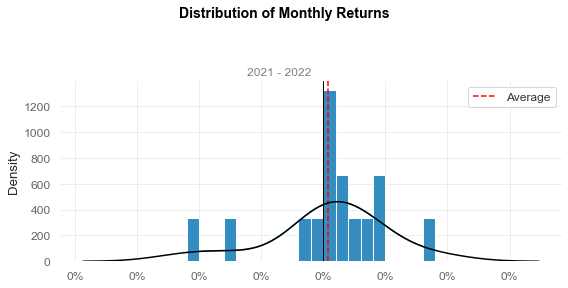

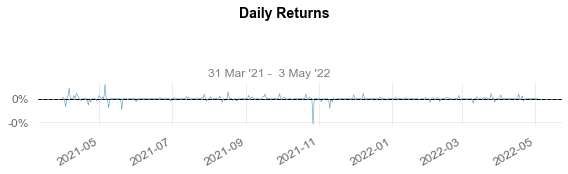

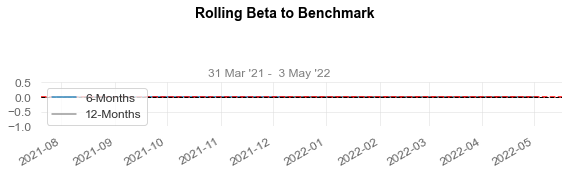

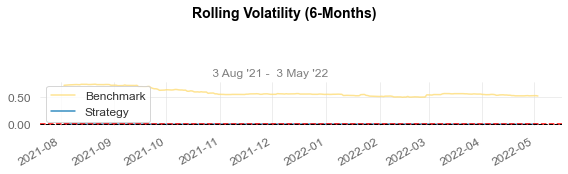

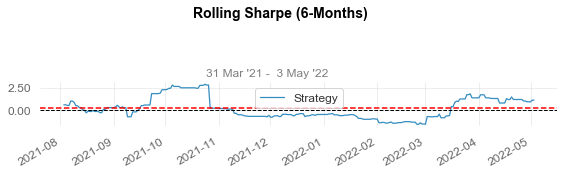

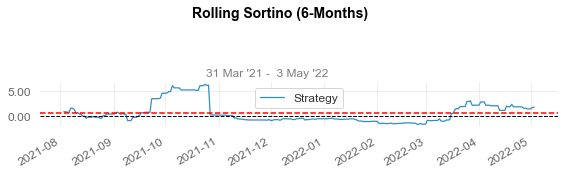

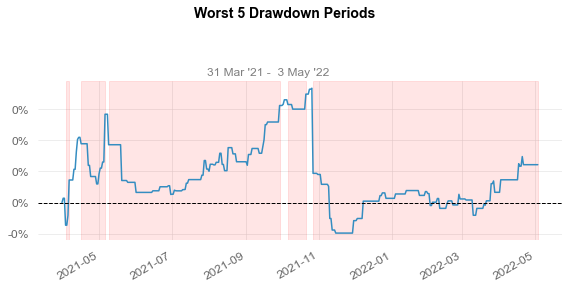

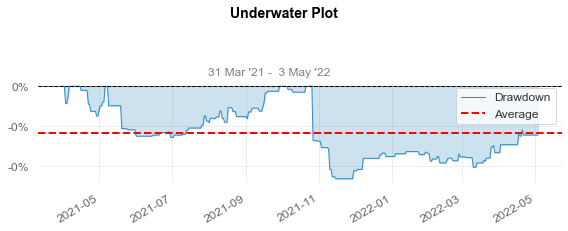

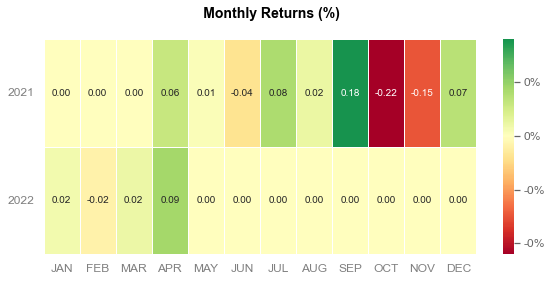

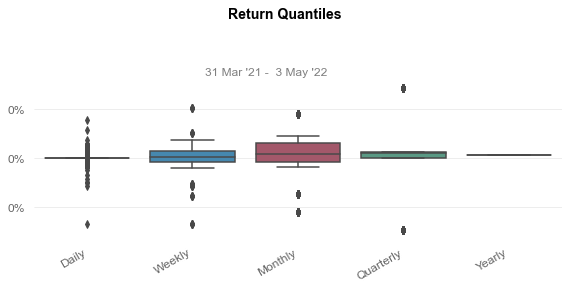

In [19]:
qs.reports.full(df_analysis["ret"], df_analysis["BMK"])